### ЛР&nbsp;№4&nbsp;&nbsp;&nbsp;&nbsp;Вариант&nbsp;14
---

In [677]:
from random import random
from scipy.integrate import quad
from scipy.stats import chi2, t

import matplotlib.pyplot as plt
import numpy as np

In [678]:
def generate_variation_series(n):
    a, b = 0, np.pi / 4
    series = np.around([np.tan(random() * (b - a) + a) for _ in range(0, n)], 3)
    series.sort()

    return series


def plot_show(has_legend=True):
    plt.grid(True, which='both', linestyle='--')
    if has_legend:
        plt.ylabel('interval len')
        plt.xlabel('$\gamma$')
        plt.legend()
    plt.show()


def calculate_intervals_len(interval):
    return [i[1] - i[0] for i in interval]

In [679]:
gamma = (0.90, 0.95, 0.98, 0.99)

#### Задание&nbsp;1
---

Найдем точечную оценку математического ожидения по формуле:

\begin{equation*}
m_x^* = \frac{1} n \sum_{i=1}^n x_i
\end{equation*}

In [680]:
def calculate_expected_value(series):
    return sum(series) / len(series)

Найдем точечную несмещенную оценку дисперсии:

\begin{equation*}
D = \frac{1}{n-1} \sum_{i=1}^n{\left( x_i - m_x^* \right)}^2
\end{equation*}

In [681]:
def calculate_dispersion(expected_val, series):
    return sum([(i - expected_val) ** 2 for i in series]) / (len(series) - 1)


И построим доверительный интервал для математического ожидания:

\begin{equation*}
m_x^* - \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}} \leq m_x \le m_x^* + \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}}
\end{equation*}

где $t$- значение, взятое из таблицы Стьюдента для заданного уровня зачимости и обьема выборки

In [682]:
def create_intervals(expected_val, dispersion, series_len, student):
    t_i = lambda t: dispersion * t / np.sqrt(series_len - 1)
    return [(expected_val - t_i(i), expected_val + t_i(i)) for i in student]


def get_empiric_interval(series, expected_val, student):
    dispersion = calculate_dispersion(expected_val, series)
    return create_intervals(expected_val, dispersion, len(series), student), dispersion


def get_theoretic_interval(series, expected_val, student):
    dispersion = quad(lambda x: x ** 2 * (4 / (np.pi * (1 + x ** 2))), 0, np.pi / 4)[0]
    dispersion -= quad(lambda x: x * (4 / (np.pi * (1 + x ** 2))), 0, np.pi / 4)[0] ** 2
    return create_intervals(expected_val, dispersion, len(series), student), dispersion

In [683]:
def plot_significance_level(series, y_lim=(0.01, 0.12)):
    student = [t.ppf(1-(1-i)/2, len(series) - 1) for i in gamma]
    expected_value = calculate_expected_value(series)
    empiric = get_empiric_interval(series, expected_value, student)
    theoretic = get_theoretic_interval(series, expected_value, student)

    empiric_intervals_len = calculate_intervals_len(empiric[0])
    theoretic_intervals_len = calculate_intervals_len(theoretic[0])

    plt.title('series size = {}, $m_x={}$'.format(len(series), expected_value))
    plt.ylim(y_lim)
    plt.plot(gamma, empiric_intervals_len, label='empiric D = {}'.format(empiric[1]))
    plt.plot(gamma, theoretic_intervals_len, label='theoretic D = {}'.format(theoretic[1]))
    plot_show()

    return empiric_intervals_len, theoretic_intervals_len

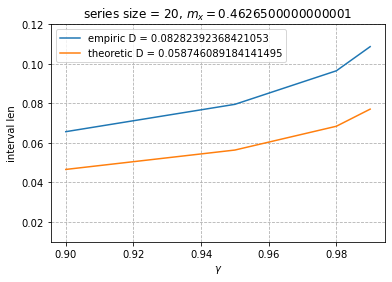

In [684]:
_ = plot_significance_level(generate_variation_series(20))



Повторим предыдущее действие для обьема выборки: $n=30,50,70,100,150$

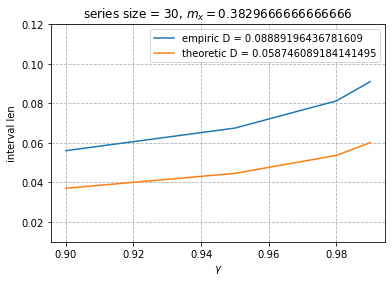

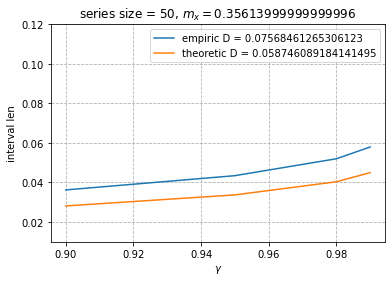

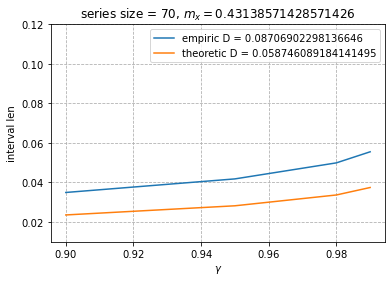

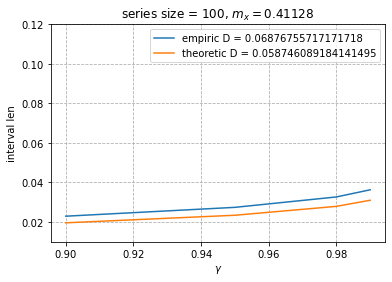

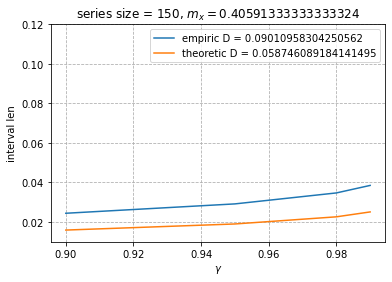

In [685]:
series_len = (30, 50, 70, 100, 150)
intervals = [plot_significance_level(generate_variation_series(i))[1] for i in series_len]

С увеличение обьема выборки эмпирическое значение математического ожидания приближается к теоритическому

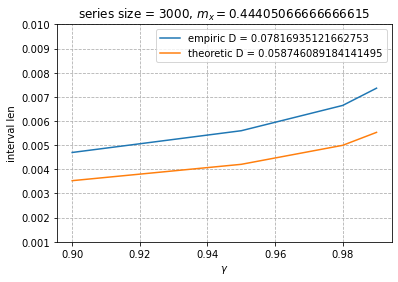

In [686]:
_ = plot_significance_level(generate_variation_series(3000), (0.001, 0.01))

При увеличении выборки в $20$ раз эмпирическое мат. ожидание больше теоретического примерно на $0.001$ при
$\gamma=0.90$ т.е при увеличении обьема выборки эмпирическое мат. ожидание приближается к теоритическому.

Построим графики зависимости величины доверительного интервала от объема выборки

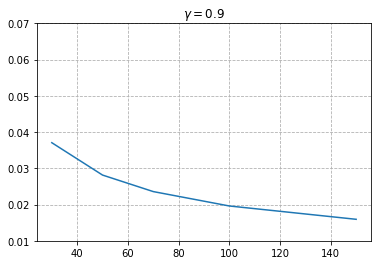

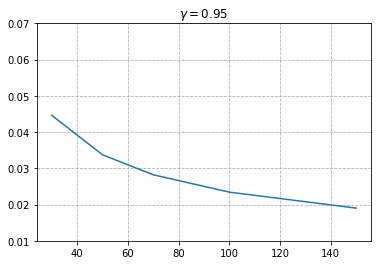

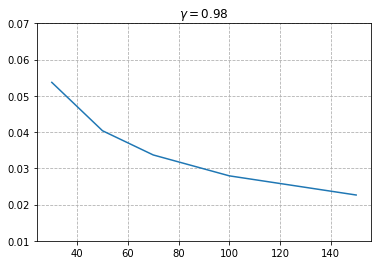

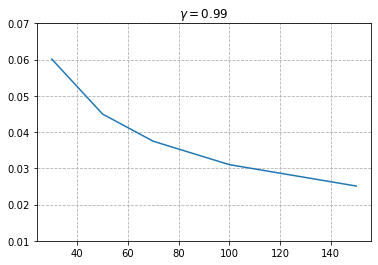

In [687]:
def plot_volume_dependent(y_lim, intervals):
    for j in range(len(gamma)):
        plt.title('$\gamma={}$'.format(gamma[j]))
        plt.ylim(y_lim)
        plt.plot(series_len, [intervals[i][j] for i in range(len(series_len))])
        plot_show(False)


plot_volume_dependent((0.01, 0.07), intervals)

С увеличением обема выборки увеличивается доверительный интервал.
Набольший доверительный интервал получен при доверительной вероятности равной $\gamma=0.99$

#### Задание&nbsp;2
---

Точечные оценки дисперсии и мат.ожидания найдем использую методы из задания выше.

Доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости.

\begin{equation*}
\frac{nD}{\chi_{\frac{1-\gamma}{2}, n-1}^2} \leq D_x < \frac{nD}{\chi_{\frac{1+\gamma}{2}, n-1}^2}
\end{equation*}

In [688]:
def get_dispersion_interval(series, dispersion):
    ns = len(series) * dispersion
    dispersion_intervals = []
    for j in gamma:
        chi_l = chi2.ppf(1 - (1 - j) / 2, len(series))
        chi_r = chi2.ppf(1 - (1 + j) / 2, len(series))
        dispersion_intervals.append((ns / chi_l, ns / chi_r))

    return dispersion_intervals

In [689]:
def create_empiric_expected_interval(series):
    empiric_expected_value = calculate_expected_value(series)
    empiric_dispersion = calculate_dispersion(empiric_expected_value, series)
    return get_dispersion_interval(series, empiric_dispersion), empiric_dispersion

In [690]:
def create_theoretic_expected_interval(series):
    theoretic_expected_value = quad(lambda x: x * 4 / (np.pi * (1 + x ** 2)), 0, 4 / np.pi)[0]
    theoretic_dispersion = calculate_dispersion(theoretic_expected_value, series)
    return get_dispersion_interval(series, theoretic_dispersion), theoretic_dispersion

In [691]:
def plot_dispersion_cmp(series, y_lim=(0.01, 0.4)):
    empiric_interval_data = create_empiric_expected_interval(series)
    theoretic_interval_data = create_theoretic_expected_interval(series)

    empiric_interval_len = calculate_intervals_len(empiric_interval_data[0])
    theoretic_interval_len = calculate_intervals_len(theoretic_interval_data[0])

    plt.title('series size = {}'.format(len(series)))
    plt.ylim(y_lim)
    plt.plot(gamma, empiric_interval_len, label='empiric D = {}'.format(empiric_interval_data[1]))
    plt.plot(gamma, theoretic_interval_len, label='theoretic D = {}'.format(theoretic_interval_data[1]))
    plot_show()

    return empiric_interval_len, theoretic_interval_len

График зависимости величины доверительного интервала от уровня значимости
для эмпирической и теоретической функций

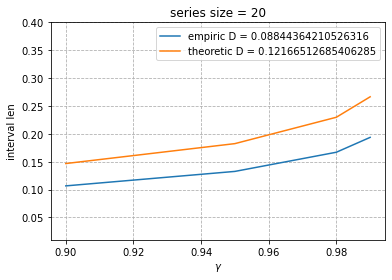

In [692]:
_ = plot_dispersion_cmp(generate_variation_series(20))

Графики зависимости величины доверительного интервала от уровня значимости
для эмпирической и теоретической функций, с размеров выборки $30, 50, 70, 100, 150$

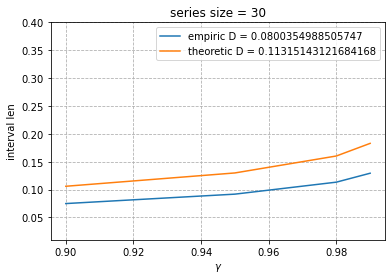

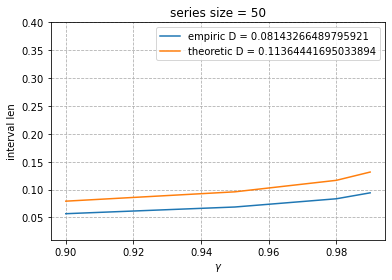

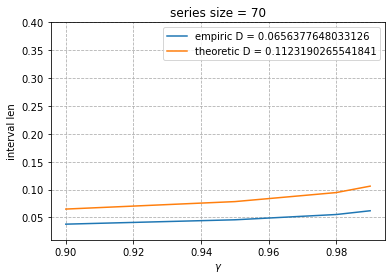

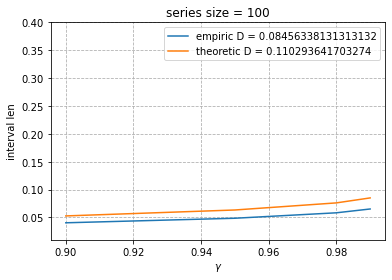

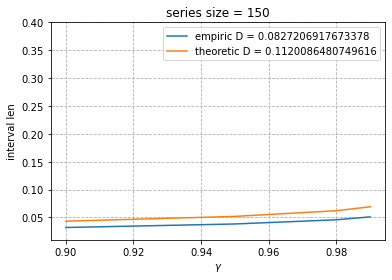

In [693]:
intervals = [plot_dispersion_cmp(generate_variation_series(i))[1] for i in series_len]

Графики зависимости величины доверительного интервала от объема выборки

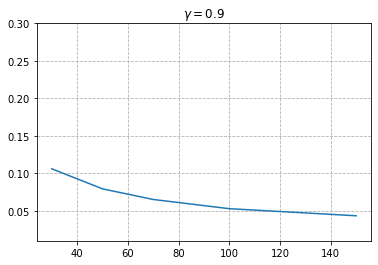

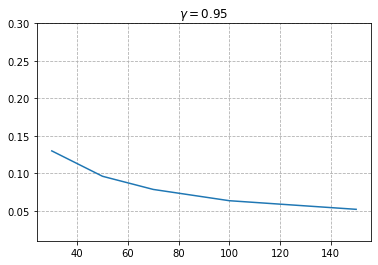

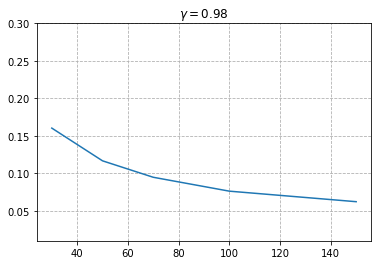

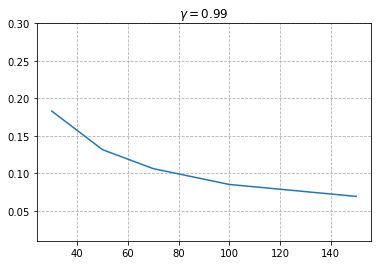

In [694]:
plot_volume_dependent((0.01, 0.3), intervals)
